In [ ]:
###  Classification on the IRIS Dataset  ###

In [ ]:
### Here we have the IRIS dataset, consisting of 50 samples each of the 3 flower classes.
### We'll visualize the data using a few methods, consider feature selection, and
### fit the data using a supervised learning algorithm.

import sys
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns

In [7]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [8]:
print("Keys of iris_data:\n{}".format(iris_data.keys()))

Keys of iris_data:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [342]:
#Let's start out by getting a description of the data we're about to work through.
#We quickly spot high class correlation between the pedal width and length (more on that later).#
#We're able to identify our features and our classes, but don't gain much insight beyond that.

print(iris_data['DESCR'][:986] + "\n")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

   



In [15]:
print(iris_data['target_names'])
print(iris_data['feature_names'])
print("Shape of data:{}".format(iris_data['data'].shape))

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data:(150, 4)


In [16]:
#Take a look at some raw data

print("First five rows of data:\n{}".format(iris_data['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [250]:
# Split data set into training and testing sets for later validation and/or testing.  Let's not
# peek at the test set, as such information could alter our model choices, defeating the purpose of model testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size = 0.3, random_state=0)

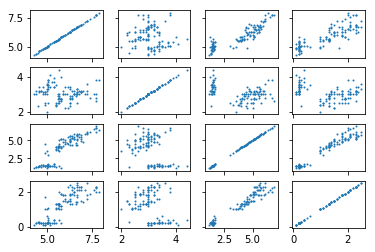

In [20]:
# Visualize the data, taking a look at how the points in general relate to the features.

fig, axes = plt.subplots(nrows=4, ncols=4,sharex='col',sharey='row')
for i in range(4):
    for j in range(4):
        ax = axes[j,i]
        ax.scatter(X_train[:, i], X_train[:, j], marker='.', s=4)
plt.show()

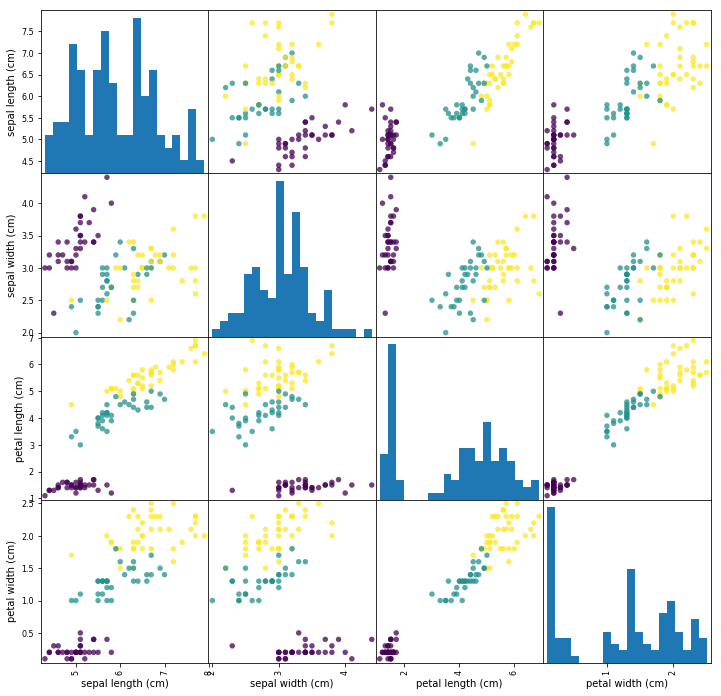

In [326]:
### Or, trying with pandas and visualizing classes and how they cluster.  ###

iris_dataframe = pd.DataFrame(X_train, columns = iris_data.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (12, 12), marker = 'o', s = 30, alpha = 0.75, hist_kwds = {'bins':20}, cmap = 'viridis')
plt.show()

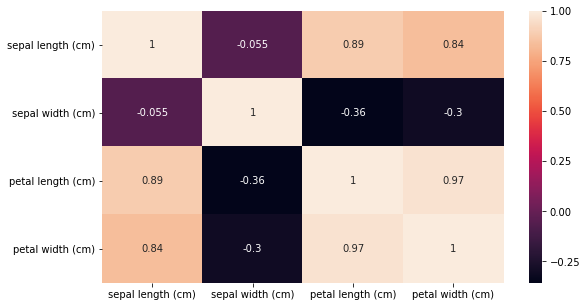

In [56]:
#Looking at the correlations between features.  If we see highly correlated features, we might choose
#to reduce the dimensionality of our feature space, as the information in said feature is redundant.
#Since our dimensionality is already low, we'll proceed without reducing the dimensionality.

plt.figure(figsize=(9,5)) 
sns.heatmap(iris_dataframe.corr(),annot=True)
plt.show()

In [285]:
# We can see that petal length and petal width are essentially the same feature.
# Proceeding, we try SVM for classification (to maximally separate the clusters in our current feature space)

from sklearn import svm
from sklearn import metrics

clf = svm.SVC(gamma=0.75, kernel='linear')
CLF = clf.fit(X_train, y_train)

In [286]:
#Let's see how good our SVM did

prediction = clf.predict(X_test)
print('The accuracy of SVM is:', metrics.accuracy_score(prediction, y_test))

The accuracy of SVM is: 0.977777777778


In [284]:
# Similarly, we could try a Decision Tree.

from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
prediction = tree_model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.977777777778


In [305]:
# Both methods are close to perfect.  It seems there is one difficult to classify point in the test set 
# that is responsible for each model's failure.  Taking a look...

x = prediction - y_test
np.nonzero(x)

(array([37]),)

In [307]:
X_test[37], y_test[37]

(array([ 6. ,  2.7,  5.1,  1.6]), 1)

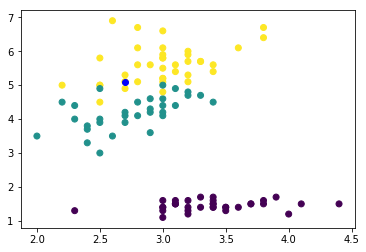

In [340]:
#Plotting the data the model was trained on, as well as our little trouble-maker in a slightly differnt blue.
#On inspection, this misclassification isn't very surprising as it sits in a sea of yellow.

plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train)
plt.scatter(2.7, 5.1, c='blue')